In [22]:
import xarray as xr
import zarr
import glob
import pandas as pd
import numpy as np
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
stranding_data = pd.read_csv('2015_2021_hatchling_stranding_summary.csv', names = ['Id', 'Date','Species','Location'])

In [3]:
stranding_data = stranding_data.loc[stranding_data['Species'] == 'Caretta caretta']

In [4]:
stranding_data['Date'] = pd.to_datetime(stranding_data['Date']) #coerce all dates to standard format
stranding_data = stranding_data.dropna(subset = ['Date']) #remove entries with no specified date

In [5]:
stranding_data.loc[stranding_data['Location'] == 'Mosselbay', 'Location'] = 'Mossel Bay'
stranding_data.loc[stranding_data['Location'] == 'Witsand', 'Location'] = 'Witsands'
stranding_data.loc[stranding_data['Location'] == 'Tenikwa PLETT', 'Location'] = 'Plettenberg Bay'
stranding_data.loc[stranding_data['Location'] == 'Tenikwa', 'Location'] = 'Plettenberg Bay'

First lets consider the location of strandings 

In [6]:
stranding_data.Location.value_counts() 

Struisbaai         304
Mossel Bay          46
Muizenberg          39
Witsands            32
Arniston            23
Plettenberg Bay     22
Hermanus            19
Sedgefield          13
Gaansbaai           12
Strandfontein        8
Kommetjie            7
Scarborough          6
Fish Hoek            6
Knysna               6
Stillbaai            4
Vleesbaai            4
Stilbaai             3
Cape Agulhas         3
Plett                3
Glencairn            3
Wilderness           2
Simons Town          2
Buffels Bay          2
Betty's Bay          2
Grotto Beach         2
Smitswinkel          1
Gordans Bay          1
Unknown              1
Aghulas              1
Kleinmond            1
Camps Bay            1
Blouberg             1
Milnerton            1
St Helena Bay        1
Blombos              1
Table Bay            1
Sandy Bay            1
St Francis           1
Kleinbaai            1
Rooiels              1
Hout Bay             1
Clovelly             1
Gordons Bay          1
Pearly Beac

In [7]:
stranding_data = stranding_data.groupby('Location').filter(lambda x: len(x) >= 10) #consider only loactions with greater then 10 strandings

In [8]:
latlong_dict = {}
latlong_dict['Struisbaai'] = [-34.80, 20.10]
latlong_dict['Mossel Bay'] = [-34.15, 22.20]
latlong_dict['Muizenberg'] = [-34.11, 18.52]
latlong_dict['Witsands'] = [-34.41, 20.92]
latlong_dict['Arniston'] = [-34.67, 20.27]
latlong_dict['Plettenberg Bay'] = [-34.07, 23.44]
latlong_dict['Hermanus'] = [-34.44, 19.25]
latlong_dict['Sedgefield'] = [-34.10, 22.78]
latlong_dict['Gaansbaai'] = [-34.64, 19.35]

In [9]:
stranding_count = stranding_data.Location.value_counts() 

In [10]:
location = []
lats = []
lons = []
count = []
for index, n in stranding_count.items():
    location.append(index)
    lats.append(latlong_dict[index][0])
    lons.append(latlong_dict[index][1])
    count.append(n)

Text(0.5, 1.0, 'Location of Turtle Hatchling Strandings in the Western Cape')

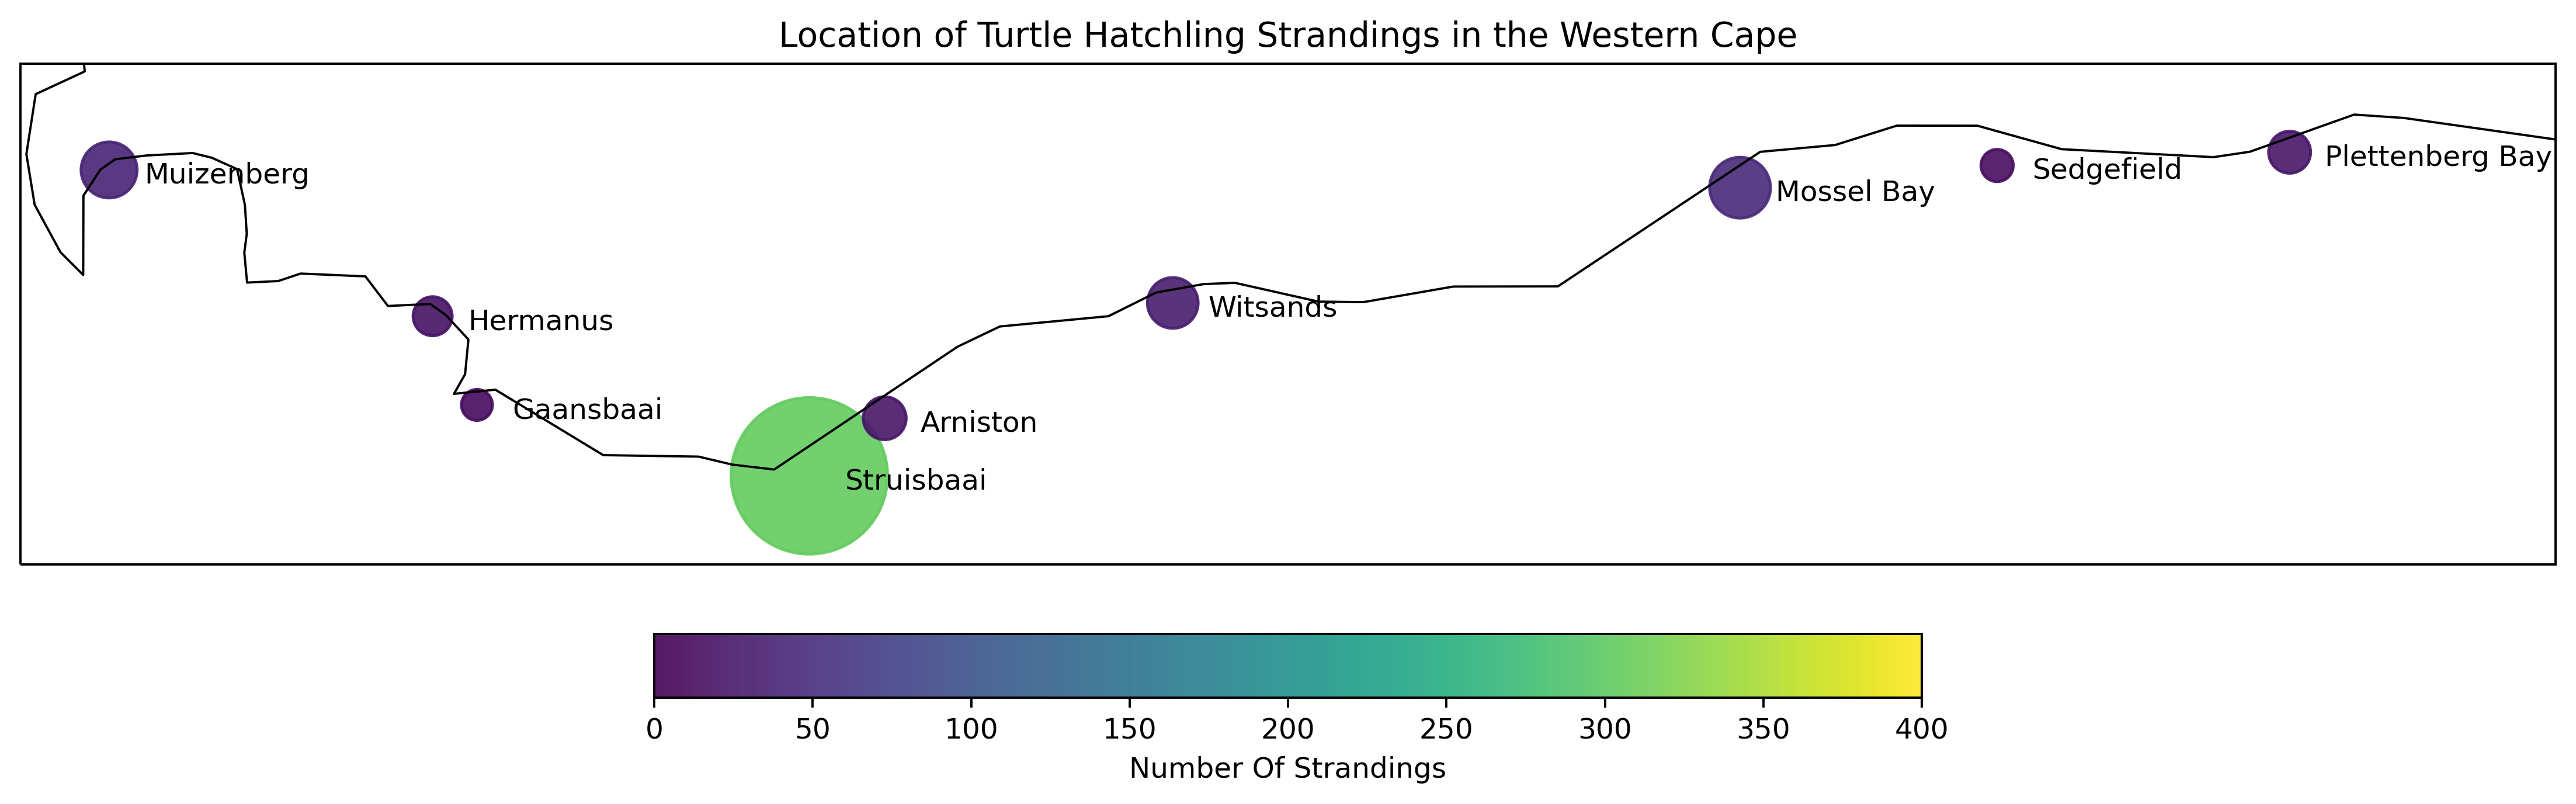

In [11]:
fig = plt.figure(figsize=(16,9), dpi = 350)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines('50m', linewidth=0.8)

extent = (np.min(lons)-0.2,np.max(lons)+0.6, np.min(lats)-0.2,np.max(lats)+0.2)
ax.set_extent(extent)

scatterplot = ax.scatter(x = lons, y = lats, c=count, s = [x*10 for x in count], cmap = 'viridis', vmin = 0, vmax = 400, alpha=0.9,transform=ccrs.PlateCarree())

for loc,lat,lon in zip(location, lats, lons):
    ax.text(lon+0.08, lat-0.03, str(loc))

plt.colorbar(scatterplot, shrink = 0.5, orientation = 'horizontal', label = 'Number Of Strandings', pad=0.05)

plt.title('Location of Turtle Hatchling Strandings in the Western Cape')

Struisbaai is by far the most common stranding location

plot as days since march 

In [24]:
stranding_freq = stranding_data.groupby(stranding_data.Date).count()['Species'].rename('Standings')

In [25]:
stranding_freq.groupby(stranding_freq.index.isocalendar().year).sum().hvplot.bar().opts(title = 'Annual Strandings')

:Bars   [year]   (Standings)

In [26]:
stranding_freq.groupby(stranding_freq.index.month).sum().hvplot.bar().opts(title = 'Monthly Strandings', xlabel = 'Month')

:Bars   [Date]   (Standings)

In [27]:
stranding_freq.groupby(stranding_freq.index.isocalendar().week).sum().hvplot.bar().opts(title = 'Weekly Strandings')

:Bars   [week]   (Standings)

In [37]:
struisbaai_data = stranding_data.loc[stranding_data['Location'] == 'Struisbaai']

In [38]:
struisbaai_freq = struisbaai_data.groupby(struisbaai_data.Date).count()['Species'].rename('Standings')

In [39]:
struisbaai_freq.groupby(struisbaai_freq.index.isocalendar().week).sum().hvplot.bar().opts(title = 'Weekly Strandings in Struisbaai')

:Bars   [week]   (Standings)

In [ ]:
stranding_freq.Location.resample('').sum().fillna(0).hvplot()

:Curve   [Date]   (Location)

In [ ]:
Struisbaai_data = stranding_data.loc[stranding_data['Location'] == 'Struisbaai']

In [ ]:
Struisbaai_freq = Struisbaai_data.groupby([Struisbaai_data.Date]).count().Location.rename('Strandings_Per_Day')

In [ ]:
type(Struisbaai_freq)

pandas.core.series.Series

In [ ]:
#idx = pd.period_range(min(Struisbaai_data.Date), max(Struisbaai_data.Date))

In [ ]:
Struisbaai_freq.resample('m').sum().fillna(0).hvplot()

:Curve   [Date]   (Strandings_Per_Day)

In [ ]:
Struisbaai_freq.resample('y').sum().fillna(0).hvplot.bar().opts(title = 'strandings per year', xrotation=90)

:Bars   [Date]   (Strandings_Per_Day)

In [ ]:
I can definitely edit 